# HDDT analysis - Club #

## An analysis of the clubs associated with members of the CEDA 1830 -1870 ##

<img src="club.png">

This graph shows all of the club data in the database rendered by gexf (see iterative sections 1 and 2) 

# Introduction #

343 members of the community are recorded as members of 68 clubs and each of these clubs constitutes a sphere of interest where meetings between members concerning the CEDA may have taken place, equally they may also be places where members might meet up only infrequently or informally. The visual analysis of connectivity between members in single clubs and between members of multiple clubs indicates the extent that the community is societally connected. The 343 make up 11% of the entire community. 

The above graph shows the 343 distributed by club membership with the connectivity between them reflected in those members who are associated with more than one society.  

We can see that the members of the CEDA were not networked through membership of clubs with the sole exception of the Athenaeum Club.

In [1]:
# First we call up the python packages we need to perform the analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(20, 10))
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately.
import nbconvert
import csv

## Iterative Section 1 - (This is an iterative workbook) ##

As can be seen in the illustrative graph above which has been produced in Gephi by the code cells below to provide an initial overview of the data and its distribution, the graph might be made more meaningful if it did not include societies sparsely populated. 

The code cell below and the code cells in the section Iterative Section 2 (below) have therefore been designed so that a second run through the workbook can be made where the second run uses data that excludes low populated occupations identified in the first run through.

In [3]:
# Second we call up the csv files generated from the SQL database that contain information about 
# locations and the community members associated with locations. As well as enabling the locations to be listed 
# we produce a 'node_names' file and a tuples file of edges_attributes to generate the files need to 
# produce GefX files for Gephi.

# We can run the code cell twice, first with all data and once all data has been examined
# and a decision made to exclude 'noise' the code block can be run again with newly generated 
# csv files that exclude low populated locations.

club = pd.read_csv ('club_202107221303.csv')

# Use these csv files in the 'with open' statements below to generate locations.gexf
names = pd.read_csv ('vw_3_club_names_1_2_202108061510.csv')# For nodes csv
tuples = pd.read_csv ('vw_2_club_membership_xid_202108061514.csv')# For edges.csv

# Use these csv files in the 'with open' statements below to generate locations_10.gexf
#club_10_names = pd.read_csv ('vw_society_10_names_1_2_202108041124.csv') # For nodes csv
#club_10_tuples = pd.read_csv ('vw_society_10_202108041124.csv') # For edges.csv


with open('vw_3_club_names_1_2_202108061510.csv', 'r') as nodecsv: # Open the Nodes csv file
    nodereader = csv.reader(nodecsv) # Read the csv
    nodes = [n for n in nodereader][1:]# Retrieve the data (using Python list comprhension and list slicing
                                       # to remove the header row
    node_names = [n[0] for n in nodes] # Get a list of only the node names

with open('vw_2_club_membership_xid_202108061514.csv', 'r') as edgecsv: # Open the file
    edgereader = csv.reader(edgecsv) # Read the csv
    edge_list = list(edgereader) # Convert to list, so can iterate below in for loop
    
    # Create empty arrays to store edge data and edge attribute data
    edges = []
    edges_attributes = []
    
    # Fill the arrays with data from CSV
    for e in edge_list[1:]:
        edges.append(tuple(e[0:2])) # Get the first 2 columns (source, target) and add to array
        # not used this time. edges_attributes.append(tuple(e[2:4])) 
        # Get the 3rd and 4th columns (first_year, last_year) and add to array
    
edge_names = [e[0] for e in edges] # Get a list of only the edge names   

## We begin by listing out and validating all of the club data in the database ##

In [12]:
# List out the clubs to be analysed

club

,id,name,notes
0,2,Athenaeum Club,NaN
1,3,Marlborough Club,NaN
2,4,Carlton Club,NaN
3,5,Oriental Club,NaN
4,6,National Club,NaN
...,...,...,...
63,65,Royal Albert Yacht Club,NaN
64,66,Berwickshire Naturalists Field Club,NaN
65,67,Indian Club,NaN
66,68,Ad Eundem,NaN


In [13]:
# List out the community members who have been associated with at least one club.

names

,Name
0,Ad Eundem
1,Albemarle Burlington Club
2,Albert Club
3,Albert Fytche
4,Alexander Cunningham
...,...
338,x Lefroy
339,x Richards
340,"x Ripon, De Grey and"
341,x Strangford


In [14]:
# Finally list out the tuples of members and clubs 
# (Note - some members are associated with more that one club)

tuples

,Source,Target
0,William (1) Adams,Athenaeum Club
1,Rutherford Alcock,Athenaeum Club
2,William Amhurst Tyssen Amhurst,Athenaeum Club
3,William Amhurst Tyssen Amhurst,Marlborough Club
4,William Amhurst Tyssen Amhurst,Carlton Club
...,...,...
318,James Whishaw,Oriental Club
319,S W D Williams,Athenaeum Club
320,William Smith Windham,Carlton Club
321,Henry Drummond Wolff,Athenaeum Club


## Use pyplot to make an inital visualisation of the data ##

We can see that many clubs are thinly populated. 

We can also see that whilst some clubs have several members of the CEDA, most have very few.  

none of the inital segmentation requires qualification. 

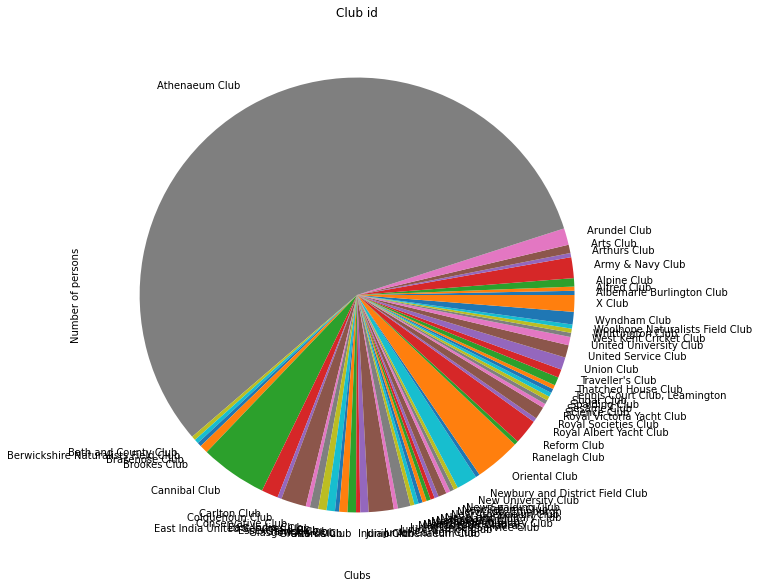

In [15]:
tuples.groupby('Target')['Source'].nunique().plot(kind='pie')
plt.title ("Club id")
plt.xlabel ("Clubs")
plt.ylabel ("Number of persons")
plt.show()

## Iterative Section 2 - prepare the data for rendering as a graph in Gephi ##

### Caution - this section depends on the selections made under 'Iterative Section 1' above ###

If the initial analysis suggests that a more insightful visualisation might be made by refing the data to be analysed, return to the database and make a new Nodes (Names) csv file and a new Tuples csv file conaining only well populated groups.

Then return to Iterative Section 1 codeblock in the workbook and replace the csv files in the 'with open' code lines with the refined datasets.

Finally reset the nx.write_gexf (xxx.gexf) xxx statement to a new file name.

Then run all code blocks again and make a more insightful gexf file. Use that to produce an improved network graph for Stage 2 analysis.

Warning. - Ensure that the statement 'nx.write_gexf' in the last code cell in this section points to a new output file for Gephi. (eg., G, 'xxxx_10.gexf')Failure to set this value correctly will result in the previously generated .gexf file being overwritten instead.


In [8]:
print("Nodes length: ", len(node_names))
print("Edges length: ", len(edges))
# not used this time. print("Edges attributes length: ", len(edges_attributes)) # This should be the same length as edges

Nodes length:  343
Edges length:  323


In [9]:
# First check that the data is correctly formatted

print("First 5 nodes:", node_names[0:5])
print("First 5 edges:", edges[0:5])
# not used this time. print("First 5 edges attributes:", edges_attributes[0:5])

# The output will appear below this code cell.

First 5 nodes: ['Ad Eundem', 'Albemarle Burlington Club', 'Albert Club', 'Albert Fytche', 'Alexander Cunningham']
First 5 edges: [('William (1) Adams', 'Athenaeum Club'), ('Rutherford Alcock', 'Athenaeum Club'), ('William Amhurst Tyssen Amhurst', 'Athenaeum Club'), ('William Amhurst Tyssen Amhurst', 'Marlborough Club'), ('William Amhurst Tyssen Amhurst', 'Carlton Club')]


In [10]:
# We use NetworkX to build the graph data into a table

G = nx.Graph()
G.add_nodes_from(node_names)
G.add_edges_from(edges)
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 343
Number of edges: 323
Average degree:   1.8834


In [11]:
# Finally we can write a gexf file which will be placed in the root directory.
# We can then open the file in Gephi and visualise the network.

nx.write_gexf(G, 'club.gexf')

## Stage 2 - This stage was not undertaken because the low level of networking between clubs suggests that it is not required ##

We now re-run the code to generate a new gexf file for gephi. We use the refined pair of nodes (Names) and Tuples files generated in the SQL database that include only the top 10 locations.

In [16]:
# club_10_names

In [17]:
# club_10_tuples

In [18]:
## We now have a graph of the dataset that can be analysed more easily ##

In [19]:
#club_10_tuples.groupby('Target')['Source'].nunique().plot(kind='pie')
#plt.title ("Club 10 id")
#plt.xlabel ("Societies")
#plt.ylabel ("Number of persons")
#plt.show()

<img src="society_10.png">